# Simple Linear Regression Model for WINE QUALITY

# Importing the required Libraries

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
import matplotlib 
matplotlib.use('TkAgg')

In [6]:
import pandas_profiling

In [8]:
import numpy as np

In [9]:
import seaborn as sns

In [10]:

import sklearn


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn import metrics

In [13]:
#print many statements at same time using the below command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

# Reading the CSV file from the machine

In [15]:

sub= pd.read_csv("D:\Module3_RP\Session1\winequality-demo - demo.csv", sep=';')

FileNotFoundError: [Errno 2] File b'D:\\Module3_RP\\Session1\\winequality-demo - demo.csv' does not exist: b'D:\\Module3_RP\\Session1\\winequality-demo - demo.csv'

Statistical Observations of the given data:
since we are not treating the missing values and ouliers, these values are least significant. 
But if we observe residual sugar,free sulfur dioxide,total sulfur dioxide and fixed acidity may have many outliers, treating which will improve the model.

In [124]:
sub.describe(include = 'all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [125]:
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [126]:
print(wine)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36           20.70      0.045   
1               6.3             0.300         0.34            1.60      0.049   
2               8.1             0.280         0.40            6.90      0.050   
3               7.2             0.230         0.32            8.50      0.058   
4               7.2             0.230         0.32            8.50      0.058   
5               8.1             0.280         0.40            6.90      0.050   
6               6.2             0.320         0.16            7.00      0.045   
7               7.0             0.270         0.36           20.70      0.045   
8               6.3             0.300         0.34            1.60      0.049   
9               8.1             0.220         0.43            1.50      0.044   
10              8.1             0.270         0.41            1.45      0.033   
11              8.6         

# Creating Features and Labels

Lables/Dependent Variable: QUALITY

Features/Independent Variables: All Columns otherthan Quality

In [127]:
x=wine.drop('quality',axis=1)

In [128]:
y=wine['quality']

In [129]:
x.head
y.head

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36           20.70      0.045   
1               6.3             0.300         0.34            1.60      0.049   
2               8.1             0.280         0.40            6.90      0.050   
3               7.2             0.230         0.32            8.50      0.058   
4               7.2             0.230         0.32            8.50      0.058   
5               8.1             0.280         0.40            6.90      0.050   
6               6.2             0.320         0.16            7.00      0.045   
7               7.0             0.270         0.36           20.70      0.045   
8               6.3             0.300         0.34            1.60      0.049   
9               8.1             0.220         0.43            1.50      0.044   
10              8.1             0.270         0.41            1.45      0.033  

<bound method NDFrame.head of 0       6
1       6
2       6
3       6
4       6
5       6
6       6
7       6
8       6
9       6
10      5
11      5
12      5
13      7
14      5
15      7
16      6
17      8
18      6
19      5
20      8
21      7
22      8
23      5
24      6
25      6
26      6
27      6
28      6
29      7
       ..
4868    6
4869    6
4870    7
4871    6
4872    5
4873    6
4874    6
4875    6
4876    7
4877    5
4878    4
4879    6
4880    6
4881    6
4882    5
4883    6
4884    5
4885    6
4886    7
4887    7
4888    5
4889    6
4890    6
4891    6
4892    5
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64>

Exploratory Data Analysis Report of the given data:

In [130]:
eda_report = pandas_profiling.ProfileReport(wine)

In [131]:
eda_report.to_file("winequality_eda.html")

In [132]:
type(wine)

pandas.core.frame.DataFrame

# Data Standardization

X_scld has the standardized values, and x_scld.describe shows the statiscal observations in scaled values

Observations: all the values are scaled between 0 and 1, 

In [133]:
from sklearn.preprocessing import MinMaxScaler
scld=MinMaxScaler(feature_range=(0,1))
arr_scld=scld.fit_transform(x)
x_scld=pd.DataFrame(arr_scld,columns=x.columns)
x.head()
x_scld.head()
x.describe()
x_scld.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,0.293730,0.194354,0.201320,0.088825,0.109117,0.116056,0.300141,0.133360,0.425697,0.313775,0.405527
std,0.081141,0.098818,0.072903,0.077792,0.064831,0.059258,0.098603,0.057662,0.137273,0.132704,0.198487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240385,0.127451,0.162651,0.016871,0.080119,0.073171,0.229698,0.088924,0.336364,0.220930,0.241935
50%,0.288462,0.176471,0.192771,0.070552,0.100890,0.111498,0.290023,0.127820,0.418182,0.290698,0.387097
75%,0.336538,0.235294,0.234940,0.142638,0.121662,0.153310,0.366589,0.173318,0.509091,0.383721,0.548387
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [134]:
x1=x.corr()

Looking for colinearity among the features

In [135]:
x1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433


(<Figure size 3500x3500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12edc25ef28>)

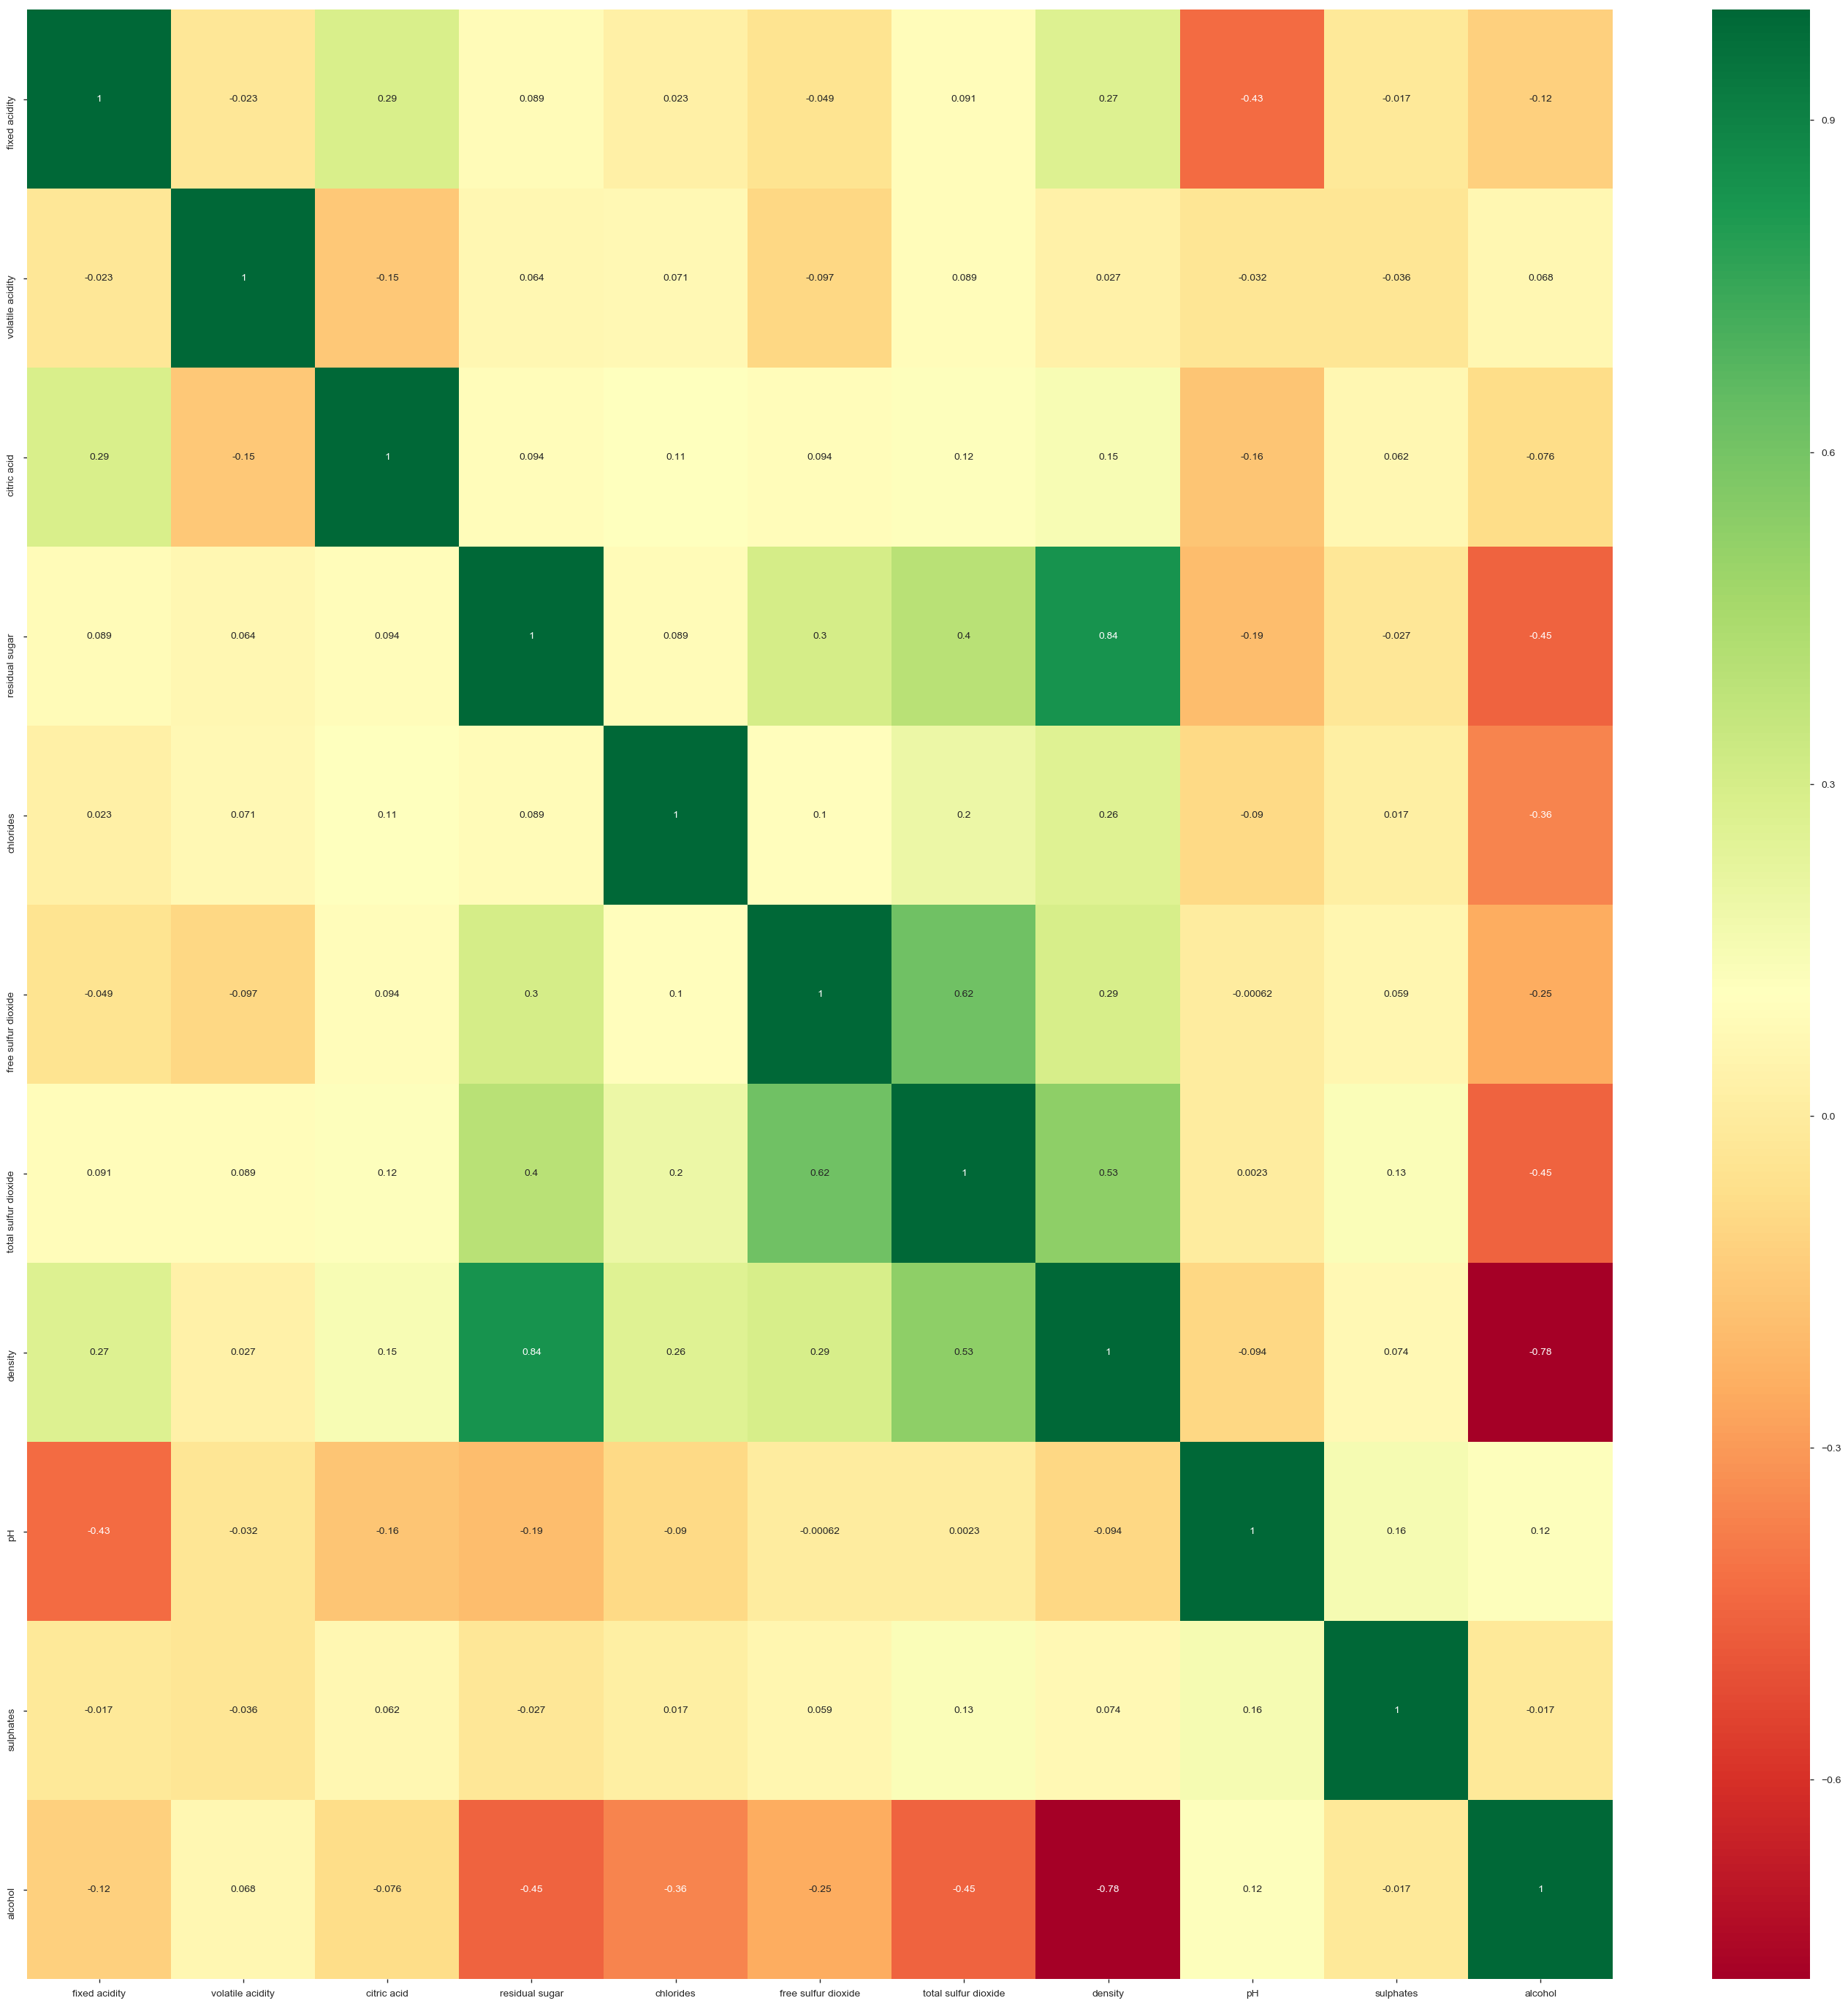

In [51]:
plt.subplots (figsize=(35,35))
sns.heatmap(x1,cmap='RdYlGn',annot=True)


From the above heat map, DENSITY & RESIDUAL SUGAR ,TOTAL SULPHUR DIOXIDE & RESIDUAL SUGAR are correlated. Considering this multicolinearity might imporove the model

# Split Train and Test Data

Train Data=70% Test Data=30%

In [136]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.30,random_state=1)

In [137]:
train_x.shape
train_y.shape
test_x.shape
test_y.shape

(3428, 11)

(3428,)

(1470, 11)

(1470,)

# Instatiate the model

Since only 1 Label, SIMPLE REGRESSION MODEL is used.

In [138]:
from sklearn.linear_model import LinearRegression

In [141]:
lm=LinearRegression()

# Fitting the Train Dataset into the model

In [144]:
lm.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Implementing the model to test data

Predicting the label variable for the test data, Predict_test is the new column added to X

In [145]:
predict_test=lm.predict(test_x)

Extracting the Coefficients of the respective features for the created model.

In [147]:
print(lm.coef_)


[ 5.05720124e-02 -1.99701100e+00  2.86986515e-03  7.87685381e-02
 -5.26695620e-01  2.88140351e-03  4.27771478e-05 -1.34394915e+02
  6.26499100e-01  5.76517695e-01  2.20279529e-01]


To display the Coefficients and along with the Features name.

In [148]:
df_m=pd.DataFrame({'features':x.columns,'coeff':lm.coef_})


In [149]:
df_m=df_m.sort_values(by=['coeff'])
df_m

,features,coeff
7,density,-134.394915
1,volatile acidity,-1.997011
4,chlorides,-0.526696
6,total sulfur dioxide,0.000043
2,citric acid,0.002870
5,free sulfur dioxide,0.002881
0,fixed acidity,0.050572
3,residual sugar,0.078769
10,alcohol,0.220280
9,sulphates,0.576518


From the above table, CITRIC ACID, TOTAL SULFUR DIOXIDE & FREE SULFUR DIOXIDE hasless coeff ; they are least influenced on the Quality of the Wine

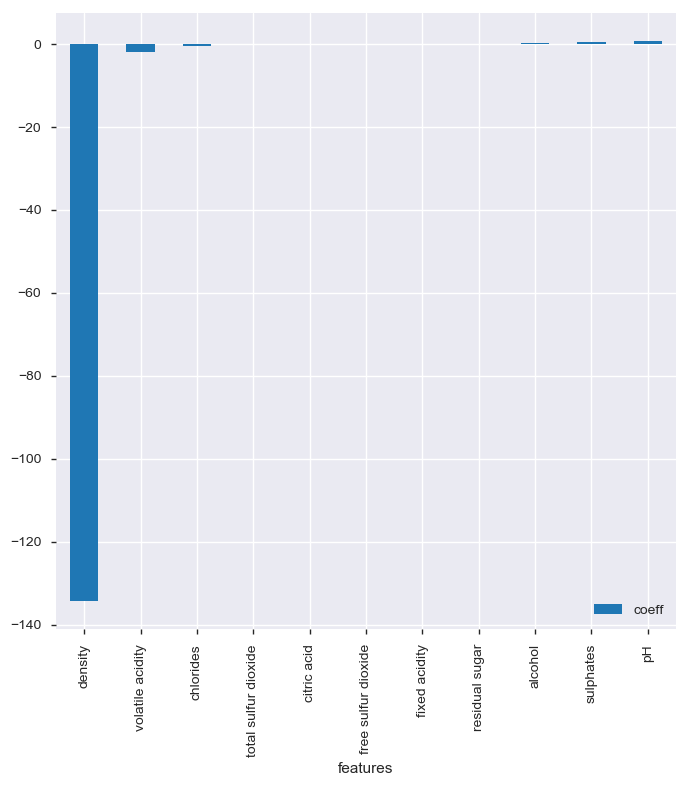

In [150]:
df_m.plot(x='features',y='coeff',kind='bar',figsize=(8,8))


In [151]:
("R squared value for TEST Data is-")
np.round(lm.score(test_x,test_y)*100,0)

'R squared value for TEST Data is-'

28.0

In [152]:
("R squared value for Train Data is-")
np.round(lm.score(train_x,train_y)*100,0)

'R squared value for Train Data is-'

28.0

In [155]:
print("Mean Square Error (MSE) for Test Data is")
np.round(metrics.mean_squared_error(test_y,predict_test),2)

Mean Square Error (MSE) for Test Data is


0.54

In [156]:
print("Mean Absolute Error (MSE) for Test Data is")
np.round(metrics.mean_absolute_error(test_y,predict_test),2)

Mean Absolute Error (MSE) for Test Data is


0.58

Creating a new table, which has existing Quality values, Predicted values and the error

In [157]:
fdf=pd.concat([test_x,test_y],1)


In [158]:
fdf['Predicted']=np.round(predict_test,1)



In [159]:
fdf['Prediction Error']=fdf['quality']-fdf['Predicted']

In [160]:
fdf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Predicted,Prediction Error
2414,6.2,0.380,0.18,7.40,0.095,28.0,195.0,0.99773,3.53,0.71,9.20,4,5.2,-1.2
1584,6.4,0.250,0.74,7.80,0.045,52.0,209.0,0.99560,3.21,0.42,9.20,6,5.5,0.5
3248,6.4,0.250,0.37,4.50,0.039,41.0,147.0,0.99210,3.18,0.40,11.10,7,6.1,0.9
645,6.3,0.260,0.25,7.80,0.058,44.0,166.0,0.99610,3.24,0.41,9.00,5,5.4,-0.4
3163,7.1,0.360,0.37,4.80,0.019,39.0,114.0,0.99036,3.08,0.49,12.70,7,6.5,0.5
4895,6.5,0.240,0.19,1.20,0.041,30.0,111.0,0.99254,2.99,0.46,9.40,6,5.3,0.7
600,6.7,0.300,0.35,1.40,0.180,36.0,160.0,0.99370,3.11,0.54,9.40,6,5.1,0.9
1379,6.9,0.460,0.20,0.90,0.054,5.0,126.0,0.99200,3.10,0.42,10.40,6,5.1,0.9
1554,7.9,0.420,0.49,8.20,0.056,32.0,164.0,0.99650,3.29,0.60,11.20,7,5.7,1.3
643,6.4,0.240,0.28,11.50,0.050,34.0,163.0,0.99690,3.31,0.45,9.50,5,5.8,-0.8


# Model2: Rebuilding the model removing insignificant variables

CITRIC ACID , FREE SUFUR DIOXIDE and TOTAL SULFUR DIOXIDE are removed from the Features 

The whole steps are repeated again

In [161]:
x=wine.drop(['citric acid','free sulfur dioxide','total sulfur dioxide','quality'],1)
x.head(5)

,fixed acidity,volatile acidity,residual sugar,chlorides,density,pH,sulphates,alcohol
0,7.0,0.27,20.7,0.045,1.0010,3.00,0.45,8.8
1,6.3,0.30,1.6,0.049,0.9940,3.30,0.49,9.5
2,8.1,0.28,6.9,0.050,0.9951,3.26,0.44,10.1
3,7.2,0.23,8.5,0.058,0.9956,3.19,0.40,9.9
4,7.2,0.23,8.5,0.058,0.9956,3.19,0.40,9.9


In [162]:
y=wine['quality']
y.head(5)

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

In [163]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.30,random_state=1)

In [164]:
train_x.shape
train_y.shape
test_x.shape
test_y.shape

(3428, 8)

(3428,)

(1470, 8)

(1470,)

In [165]:
scld=MinMaxScaler(feature_range=(0,1))
arr_scld=scld.fit_transform(x)
x_scld=pd.DataFrame(arr_scld,columns=x.columns)
x.head()
x_scld.head()
x.describe()
x_scld.describe()

,fixed acidity,volatile acidity,residual sugar,chlorides,density,pH,sulphates,alcohol
0,7.0,0.27,20.7,0.045,1.0010,3.00,0.45,8.8
1,6.3,0.30,1.6,0.049,0.9940,3.30,0.49,9.5
2,8.1,0.28,6.9,0.050,0.9951,3.26,0.44,10.1
3,7.2,0.23,8.5,0.058,0.9956,3.19,0.40,9.9
4,7.2,0.23,8.5,0.058,0.9956,3.19,0.40,9.9


,fixed acidity,volatile acidity,residual sugar,chlorides,density,pH,sulphates,alcohol
0,0.307692,0.186275,0.308282,0.106825,0.267785,0.254545,0.267442,0.129032
1,0.240385,0.215686,0.015337,0.118694,0.132832,0.527273,0.313953,0.241935
2,0.413462,0.196078,0.096626,0.121662,0.154039,0.490909,0.255814,0.338710
3,0.326923,0.147059,0.121166,0.145401,0.163678,0.427273,0.209302,0.306452
4,0.326923,0.147059,0.121166,0.145401,0.163678,0.427273,0.209302,0.306452


,fixed acidity,volatile acidity,residual sugar,chlorides,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,6.391415,0.045772,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,5.072058,0.021848,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.600000,0.009000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,1.700000,0.036000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,5.200000,0.043000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,9.900000,0.050000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,65.800000,0.346000,1.038980,3.820000,1.080000,14.200000


,fixed acidity,volatile acidity,residual sugar,chlorides,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,0.293730,0.194354,0.088825,0.109117,0.133360,0.425697,0.313775,0.405527
std,0.081141,0.098818,0.077792,0.064831,0.057662,0.137273,0.132704,0.198487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240385,0.127451,0.016871,0.080119,0.088924,0.336364,0.220930,0.241935
50%,0.288462,0.176471,0.070552,0.100890,0.127820,0.418182,0.290698,0.387097
75%,0.336538,0.235294,0.142638,0.121662,0.173318,0.509091,0.383721,0.548387
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [166]:
lm.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [167]:
predict_test=lm.predict(test_x)

In [168]:
print(lm.coef_)

[ 4.88544260e-02 -2.04389130e+00  8.24851714e-02 -4.08133378e-01
 -1.37701396e+02  6.52459680e-01  6.06845664e-01  2.10361600e-01]


In [169]:
x.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,density,pH,sulphates,alcohol
0,7.0,0.27,20.7,0.045,1.0010,3.00,0.45,8.8
1,6.3,0.30,1.6,0.049,0.9940,3.30,0.49,9.5
2,8.1,0.28,6.9,0.050,0.9951,3.26,0.44,10.1
3,7.2,0.23,8.5,0.058,0.9956,3.19,0.40,9.9
4,7.2,0.23,8.5,0.058,0.9956,3.19,0.40,9.9


In [170]:
df_m=pd.DataFrame({'features':x.columns,'coeff':lm.coef_})


In [171]:
df_m=df_m.sort_values(by=['coeff'])
df_m

,features,coeff
4,density,-137.701396
1,volatile acidity,-2.043891
3,chlorides,-0.408133
0,fixed acidity,0.048854
2,residual sugar,0.082485
7,alcohol,0.210362
6,sulphates,0.606846
5,pH,0.652460


From the above table, Coefficient of FIXED ACIDITY is still less compared  to others. 

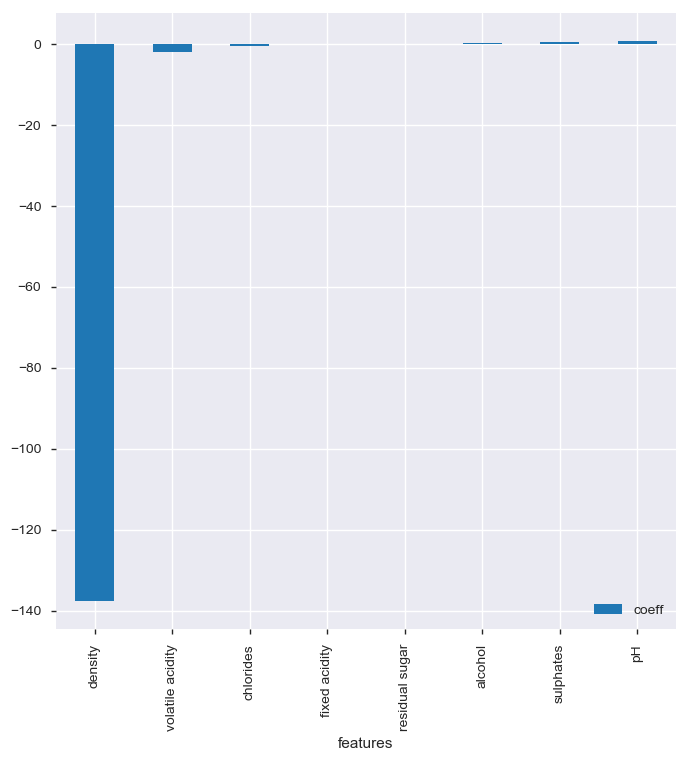

In [84]:
df_m.plot(x='features',y='coeff',kind='bar',figsize=(8,8))
plt.show()

In [85]:
("R squared value for TEST Data is-")
np.round(lm.score(test_x,test_y)*100,0)

'R squared value for TEST Data is-'

27.0

In [86]:
("R squared value for Train Data is-")
np.round(lm.score(train_x,train_y)*100,0)

'R squared value for Train Data is-'

28.0

In [87]:
print("Mean Square Error (MSE) for Test Data is")
np.round(metrics.mean_squared_error(test_y,predict_test),2)

Mean Square Error (MSE) for Test Data is


0.54

In [88]:
print("Mean Absolute Error (MSE) for Test Data is")
np.round(metrics.mean_absolute_error(test_y,predict_test),2)

Mean Absolute Error (MSE) for Test Data is


0.58

In [89]:
fdf1=pd.concat([test_x,test_y],1)
fdf1['Predicted']=np.round(predict_test,1)
fdf1['Prediction Error']=fdf1['quality']-fdf1['Predicted']
fdf1

,fixed acidity,volatile acidity,residual sugar,chlorides,density,pH,sulphates,alcohol,quality,Predicted,Prediction Error
2414,6.2,0.380,7.40,0.095,0.99773,3.53,0.71,9.20,4,5.3,-1.3
1584,6.4,0.250,7.80,0.045,0.99560,3.21,0.42,9.20,6,5.5,0.5
3248,6.4,0.250,4.50,0.039,0.99210,3.18,0.40,11.10,7,6.1,0.9
645,6.3,0.260,7.80,0.058,0.99610,3.24,0.41,9.00,5,5.4,-0.4
3163,7.1,0.360,4.80,0.019,0.99036,3.08,0.49,12.70,7,6.5,0.5
4895,6.5,0.240,1.20,0.041,0.99254,2.99,0.46,9.40,6,5.3,0.7
600,6.7,0.300,1.40,0.180,0.99370,3.11,0.54,9.40,6,5.1,0.9
1379,6.9,0.460,0.90,0.054,0.99200,3.10,0.42,10.40,6,5.2,0.8
1554,7.9,0.420,8.20,0.056,0.99650,3.29,0.60,11.20,7,5.7,1.3
643,6.4,0.240,11.50,0.050,0.99690,3.31,0.45,9.50,5,5.8,-0.8


# Model3: Rebuilding the model removing insignificant variables

NOW, lets remove another insignificant variable FIXED ACIDITY which had COEFF1=0.05072 and COEFF2=0.048854 

In [90]:
x=wine.drop(['fixed acidity','citric acid','free sulfur dioxide','total sulfur dioxide','quality'],1)
x.head(5)

,volatile acidity,residual sugar,chlorides,density,pH,sulphates,alcohol
0,0.27,20.7,0.045,1.0010,3.00,0.45,8.8
1,0.30,1.6,0.049,0.9940,3.30,0.49,9.5
2,0.28,6.9,0.050,0.9951,3.26,0.44,10.1
3,0.23,8.5,0.058,0.9956,3.19,0.40,9.9
4,0.23,8.5,0.058,0.9956,3.19,0.40,9.9


In [91]:
y=wine['quality']
y.head(5)

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

In [92]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.30,random_state=1)
train_x.shape
train_y.shape
test_x.shape
test_y.shape

(3428, 7)

(3428,)

(1470, 7)

(1470,)

In [93]:
scld=MinMaxScaler(feature_range=(0,1))
arr_scld=scld.fit_transform(x)
x_scld=pd.DataFrame(arr_scld,columns=x.columns)
x.head()
x_scld.head()
x.describe()
x_scld.describe()

,volatile acidity,residual sugar,chlorides,density,pH,sulphates,alcohol
0,0.27,20.7,0.045,1.0010,3.00,0.45,8.8
1,0.30,1.6,0.049,0.9940,3.30,0.49,9.5
2,0.28,6.9,0.050,0.9951,3.26,0.44,10.1
3,0.23,8.5,0.058,0.9956,3.19,0.40,9.9
4,0.23,8.5,0.058,0.9956,3.19,0.40,9.9


,volatile acidity,residual sugar,chlorides,density,pH,sulphates,alcohol
0,0.186275,0.308282,0.106825,0.267785,0.254545,0.267442,0.129032
1,0.215686,0.015337,0.118694,0.132832,0.527273,0.313953,0.241935
2,0.196078,0.096626,0.121662,0.154039,0.490909,0.255814,0.338710
3,0.147059,0.121166,0.145401,0.163678,0.427273,0.209302,0.306452
4,0.147059,0.121166,0.145401,0.163678,0.427273,0.209302,0.306452


,volatile acidity,residual sugar,chlorides,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,0.278241,6.391415,0.045772,0.994027,3.188267,0.489847,10.514267
std,0.100795,5.072058,0.021848,0.002991,0.151001,0.114126,1.230621
min,0.080000,0.600000,0.009000,0.987110,2.720000,0.220000,8.000000
25%,0.210000,1.700000,0.036000,0.991723,3.090000,0.410000,9.500000
50%,0.260000,5.200000,0.043000,0.993740,3.180000,0.470000,10.400000
75%,0.320000,9.900000,0.050000,0.996100,3.280000,0.550000,11.400000
max,1.100000,65.800000,0.346000,1.038980,3.820000,1.080000,14.200000


,volatile acidity,residual sugar,chlorides,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,0.194354,0.088825,0.109117,0.133360,0.425697,0.313775,0.405527
std,0.098818,0.077792,0.064831,0.057662,0.137273,0.132704,0.198487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.127451,0.016871,0.080119,0.088924,0.336364,0.220930,0.241935
50%,0.176471,0.070552,0.100890,0.127820,0.418182,0.290698,0.387097
75%,0.235294,0.142638,0.121662,0.173318,0.509091,0.383721,0.548387
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
lm.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [95]:
predict_test=lm.predict(test_x)


In [96]:
print(lm.coef_)


[-2.07319904e+00  7.08291264e-02 -6.26011823e-01 -1.07049280e+02
  4.85238054e-01  5.64468344e-01  2.44262030e-01]


In [97]:
x.head()

,volatile acidity,residual sugar,chlorides,density,pH,sulphates,alcohol
0,0.27,20.7,0.045,1.0010,3.00,0.45,8.8
1,0.30,1.6,0.049,0.9940,3.30,0.49,9.5
2,0.28,6.9,0.050,0.9951,3.26,0.44,10.1
3,0.23,8.5,0.058,0.9956,3.19,0.40,9.9
4,0.23,8.5,0.058,0.9956,3.19,0.40,9.9


In [98]:
df_m=pd.DataFrame({'features':x.columns,'coeff':lm.coef_})


In [99]:
df_m=df_m.sort_values(by=['coeff'])
df_m

,features,coeff
3,density,-107.049280
0,volatile acidity,-2.073199
2,chlorides,-0.626012
1,residual sugar,0.070829
6,alcohol,0.244262
4,pH,0.485238
5,sulphates,0.564468


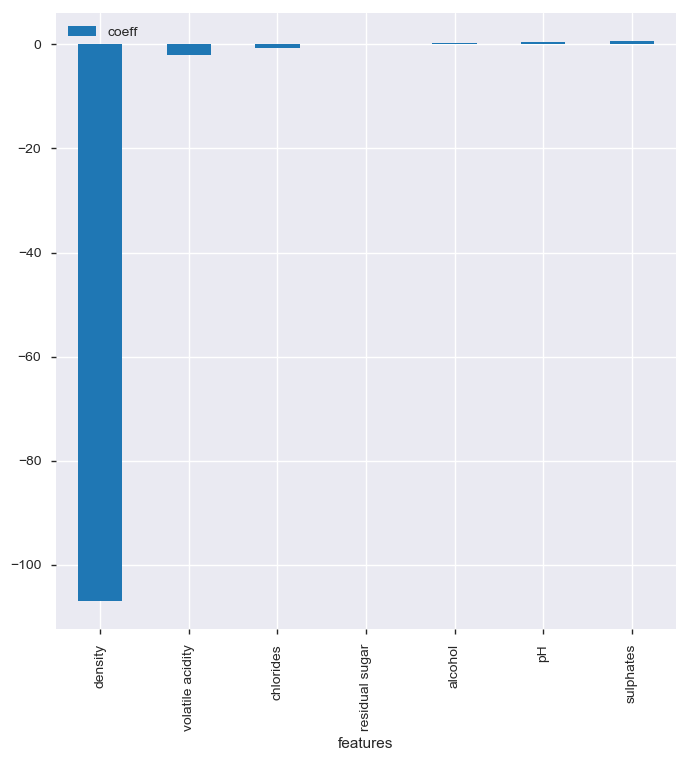

In [269]:
df_m.plot(x='features',y='coeff',kind='bar',figsize=(8,8))
plt.show()

In [100]:
("R squared value for TEST Data is-")
np.round(lm.score(test_x,test_y)*100,0)
("R squared value for Train Data is-")
np.round(lm.score(train_x,train_y)*100,0)

'R squared value for TEST Data is-'

27.0

'R squared value for Train Data is-'

28.0

In [101]:
print("Mean Square Error (MSE) for Test Data is")
np.round(metrics.mean_squared_error(test_y,predict_test),2)
print("Mean Absolute Error (MSE) for Test Data is")
np.round(metrics.mean_absolute_error(test_y,predict_test),2)

Mean Square Error (MSE) for Test Data is


0.54

Mean Absolute Error (MSE) for Test Data is


0.58

In [103]:
fdf2=pd.concat([test_x,test_y],1)
fdf2['Predicted']=np.round(predict_test,1)
fdf2['Prediction Error']=fdf2['quality']-fdf2['Predicted']
fdf2

,volatile acidity,residual sugar,chlorides,density,pH,sulphates,alcohol,quality,Predicted,Prediction Error
2414,0.380,7.40,0.095,0.99773,3.53,0.71,9.20,4,5.3,-1.3
1584,0.250,7.80,0.045,0.99560,3.21,0.42,9.20,6,5.5,0.5
3248,0.250,4.50,0.039,0.99210,3.18,0.40,11.10,7,6.1,0.9
645,0.260,7.80,0.058,0.99610,3.24,0.41,9.00,5,5.4,-0.4
3163,0.360,4.80,0.019,0.99036,3.08,0.49,12.70,7,6.5,0.5
4895,0.240,1.20,0.041,0.99254,2.99,0.46,9.40,6,5.4,0.6
600,0.300,1.40,0.180,0.99370,3.11,0.54,9.40,6,5.1,0.9
1379,0.460,0.90,0.054,0.99200,3.10,0.42,10.40,6,5.2,0.8
1554,0.420,8.20,0.056,0.99650,3.29,0.60,11.20,7,5.7,1.3
643,0.240,11.50,0.050,0.99690,3.31,0.45,9.50,5,5.8,-0.8


# Model1

RSquare for Test: 28  RSqure for Train :28

MSE=0.54 MAE=0.58

# Model2

RSquare for Test:27 RSquare for Train:28

MSE=0.54 MAE=0.58

# Model3

RSquare for Test:27 RSquare for Train:28

MSE=0.54 MAE=0.58

Displaying the Predicted and Prediction Error of all the models

In [ ]:
F['Predicted1']=fdf['Predicted']

In [190]:
F['Predicted2']=fdf1['Predicted']

In [192]:
F['Predicted3']=fdf2['Predicted']

In [194]:
F['PredictionError1']=fdf['Prediction Error']

In [196]:
F['PredictionError2']=fdf1['Prediction Error']

In [197]:
F['PredictionError3']=fdf2['Prediction Error']

In [199]:
Final=F

In [200]:
Final

,fixed acidity,volatile acidity,residual sugar,chlorides,density,pH,sulphates,alcohol,quality,Predicted1,Predicted2,Predicted3,PredictionError1,PredictionError2,PredictionError3
2414,6.2,0.380,7.40,0.095,0.99773,3.53,0.71,9.20,4,5.2,5.3,5.3,-1.2,-1.3,-1.3
1584,6.4,0.250,7.80,0.045,0.99560,3.21,0.42,9.20,6,5.5,5.5,5.5,0.5,0.5,0.5
3248,6.4,0.250,4.50,0.039,0.99210,3.18,0.40,11.10,7,6.1,6.1,6.1,0.9,0.9,0.9
645,6.3,0.260,7.80,0.058,0.99610,3.24,0.41,9.00,5,5.4,5.4,5.4,-0.4,-0.4,-0.4
3163,7.1,0.360,4.80,0.019,0.99036,3.08,0.49,12.70,7,6.5,6.5,6.5,0.5,0.5,0.5
4895,6.5,0.240,1.20,0.041,0.99254,2.99,0.46,9.40,6,5.3,5.3,5.4,0.7,0.7,0.6
600,6.7,0.300,1.40,0.180,0.99370,3.11,0.54,9.40,6,5.1,5.1,5.1,0.9,0.9,0.9
1379,6.9,0.460,0.90,0.054,0.99200,3.10,0.42,10.40,6,5.1,5.2,5.2,0.9,0.8,0.8
1554,7.9,0.420,8.20,0.056,0.99650,3.29,0.60,11.20,7,5.7,5.7,5.7,1.3,1.3,1.3
643,6.4,0.240,11.50,0.050,0.99690,3.31,0.45,9.50,5,5.8,5.8,5.8,-0.8,-0.8,-0.8


Comparing the Predicted values and Errors of three models, we can infer that there is no siginifaicant difference betwen model 2 and model 3, but we can see difference between Model 1 and 2.

We can consider MODEL 2 with MSE=0.54 and MAE=0.58.

 Ways the model can be improved:

* Treating the outliers

* Considering the Multicolinearity among the features 